In [1]:
import copy
import numpy as np
import matplotlib.pyplot as plt
from ete3.utils import color

In [2]:
LG_G4_file = "/home/piyumal/PHD/Implementation/Phylogenetics/TreeMatching2/date_testing/eucaryote-origin/complex-models-v5-mario/blength-variation/LG_G4_in.BV"

LG_G4_C60_file = "/home/piyumal/PHD/Implementation/Phylogenetics/TreeMatching2/date_testing/eucaryote-origin/complex-models-v5-mario/blength-variation/LG_G4_C60_in.BV"

In [3]:
import copy

def parse_iqtree_file(file_path):
    """
    Parses an IQ-TREE file to extract Hessian matrices and gradient vectors.

    Parameters:
    - file_path (str): Path to the IQ-TREE output file.

    Returns:
    - hessians (list): A list of Hessian matrices.
    - gradient_vectors (list): A list of gradient vectors.
    """
    hessians = []
    treestrings = []
    branch_lengths = []
    gradient_vectors = []
    hessian_list = []
    counter = 0

    with open(file_path) as f:
        for k, line in enumerate(f.readlines()):
            if counter == 3:
                treestrings.append(line.strip())
                print('tree string', k)
            if counter == 5:
                branch_lengths_numerical = line.strip().split()
                branch_lengths.append([float(i) for i in branch_lengths_numerical])
                print('branch lengths', k)
            if counter == 7:
                gradients_numerical = line.strip().split()
                gradient_vectors.append([float(i) for i in gradients_numerical])
                print('gradients', k)

            if counter > 10 and line.strip() == '':
                hessians.append(copy.deepcopy(hessian_list))
                hessian_list = []
                counter = 0
                print('Hessian all string', k)
            elif counter > 10:
                hessian_row_numerical = line.strip().split()
                hessian_list.append([float(i) for i in hessian_row_numerical])
                print('local hessian', k)
            counter += 1
        else:
            if hessian_list:  # Append the last Hessian if the file doesn't end with an empty line
                hessians.append(copy.deepcopy(hessian_list))

    return hessians[0], branch_lengths[0]


In [4]:
LG_G4_h, LG_G4_b = parse_iqtree_file(LG_G4_file)
LG_G4_C60_h, LG_G4_C60_b = parse_iqtree_file(LG_G4_C60_file)

tree string 3
branch lengths 5
gradients 7
local hessian 11
local hessian 12
local hessian 13
local hessian 14
local hessian 15
local hessian 16
local hessian 17
local hessian 18
local hessian 19
local hessian 20
local hessian 21
local hessian 22
local hessian 23
local hessian 24
local hessian 25
local hessian 26
local hessian 27
local hessian 28
local hessian 29
local hessian 30
local hessian 31
local hessian 32
local hessian 33
local hessian 34
local hessian 35
local hessian 36
local hessian 37
local hessian 38
local hessian 39
local hessian 40
local hessian 41
local hessian 42
local hessian 43
local hessian 44
local hessian 45
local hessian 46
local hessian 47
local hessian 48
local hessian 49
local hessian 50
local hessian 51
local hessian 52
local hessian 53
local hessian 54
local hessian 55
local hessian 56
local hessian 57
local hessian 58
local hessian 59
local hessian 60
local hessian 61
local hessian 62
local hessian 63
local hessian 64
local hessian 65
local hessian 66
local

In [5]:
LG_G4_h = np.array(LG_G4_h)
LG_G4_b = np.array(LG_G4_b)


LG_G4_C60_h = np.array(LG_G4_C60_h)
LG_G4_C60_b = np.array(LG_G4_C60_b)

In [6]:
LG_G4_h.shape

(201, 201)

In [7]:
LG_G4_h

array([[-46743.5  ,  -1599.34 ,  -2187.6  , ...,    671.622,    207.003,
           655.366],
       [ -1599.34 , -33429.7  , -13923.1  , ...,    369.967,    256.794,
           859.09 ],
       [ -2187.6  , -13923.1  , -63560.3  , ...,    719.334,    567.045,
           709.201],
       ...,
       [   671.622,    369.967,    719.334, ...,  -8248.51 ,   -631.679,
          -563.071],
       [   207.003,    256.794,    567.045, ...,   -631.679,  -4726.92 ,
          -607.277],
       [   655.366,    859.09 ,    709.201, ...,   -563.071,   -607.277,
         -6213.9  ]])

In [8]:
LG_G4_b.shape

(201,)

In [9]:
LG_G4_C60_h.shape

(201, 201)

In [10]:
LG_G4_C60_b.shape

(201,)

In [11]:
LG_G4_h_inv = np.linalg.inv((-1)*LG_G4_h)

In [12]:
identity = np.dot(LG_G4_h, LG_G4_h_inv)

In [13]:
identity

array([[-1.00000000e+00, -1.89819686e-17, -2.75644751e-17, ...,
         6.93778340e-17, -2.45538300e-17, -1.98330639e-17],
       [ 4.87042390e-17, -1.00000000e+00,  7.98093939e-17, ...,
         3.64270487e-17,  1.06452247e-17,  2.03442605e-17],
       [-3.80248930e-17,  6.42315076e-17, -1.00000000e+00, ...,
         1.85574677e-17, -2.87829681e-17, -6.67282090e-18],
       ...,
       [-1.34351234e-18,  7.02934695e-18, -3.06964229e-18, ...,
        -1.00000000e+00, -6.00267016e-17, -1.01345227e-17],
       [-1.68101140e-18,  2.61798034e-18, -2.91515743e-18, ...,
         2.52202434e-18, -1.00000000e+00, -3.64583912e-18],
       [ 1.38777878e-17,  6.93889390e-18, -1.73472348e-18, ...,
        -1.38777878e-17, -2.77555756e-17, -1.00000000e+00]])

In [14]:
LG_G4_C60_h_inv = np.linalg.inv((-1)*LG_G4_C60_h)

In [15]:
LG_G4_h_inv_diag = np.diag(LG_G4_h_inv)

In [16]:
LG_G4_h_inv_diag.shape

(201,)

In [17]:
LG_G4_C60_h_inv_diag = np.diag(LG_G4_C60_h_inv)

In [18]:
LG_G4_C60_h_inv_diag.shape

(201,)

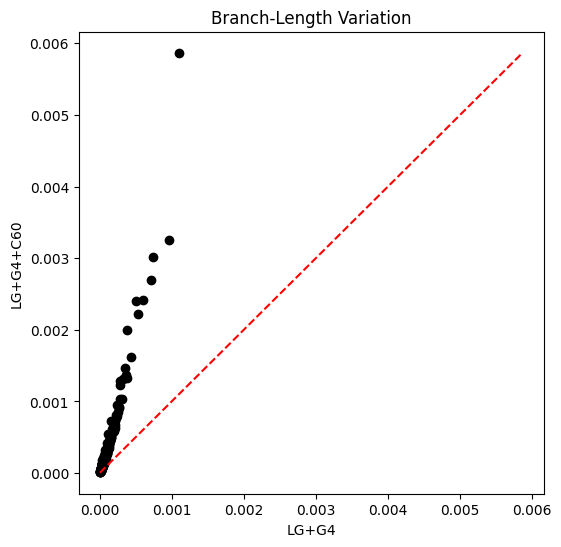

In [23]:
plt.figure(figsize=(6, 6))
plt.scatter(LG_G4_h_inv_diag,LG_G4_C60_h_inv_diag, color='black')
min_value = min(min(LG_G4_h_inv_diag), min(LG_G4_C60_h_inv_diag))
max_value = max(max(LG_G4_h_inv_diag), max(LG_G4_C60_h_inv_diag))

# Add y = x line
plt.plot([min_value, max_value], [min_value, max_value], color='red', linestyle='--', label='y = x')


# Add labels and title
plt.xlabel('LG+G4')
plt.ylabel('LG+G4+C60')
plt.title('Branch-Length Variation')

# Show the plot
plt.savefig("./bv_LG_G4_C60.png")

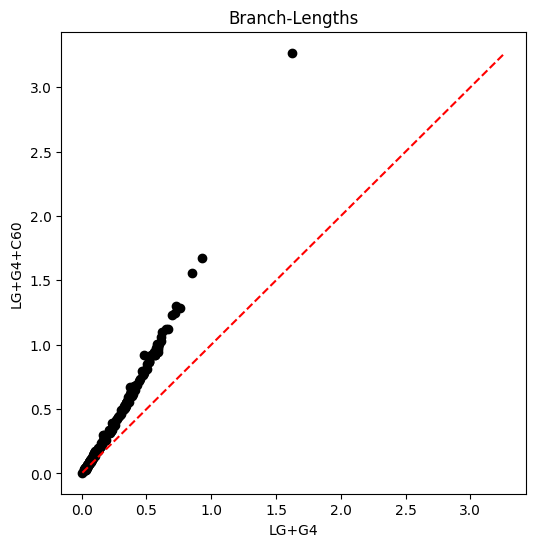

In [24]:
plt.figure(figsize=(6, 6))
plt.scatter(LG_G4_b, LG_G4_C60_b, color='black')
min_value = min(min(LG_G4_b), min(LG_G4_C60_b))
max_value = max(max(LG_G4_b), max(LG_G4_C60_b))

# Add y = x line
plt.plot([min_value, max_value], [min_value, max_value], color='red', linestyle='--', label='y = x')


# Add labels and title
plt.xlabel('LG+G4')
plt.ylabel('LG+G4+C60')
plt.title('Branch-Lengths')

# Show the plot
plt.savefig("./b_LG_G4_C60.png")